# KoronaScience Projekt 
Celem projektu jest porównanie danych, jakie posiadamy o SARS z danymi o COVID-19. Projekt został zrealizowany w ramach KoronaScience.

Autor: Ewa Roszczyk



In [ ]:
!pip install requests

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [ ]:
sars_url = f"https://raw.githubusercontent.com/mksochota16/CoronaScienceFiles/master/SARSdata.csv"
coronavirus_url = f"https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv"
coronavirus_url2 = f"https://covid.ourworldindata.org/data/ecdc/full_data.csv"

sars_data = pd.read_csv(sars_url, error_bad_lines=False)
coronavirus_data = pd.read_csv(coronavirus_url, error_bad_lines=False)  #osoby zainfekowane koronawirusem
coronavirus_data2 = pd.read_csv(coronavirus_url2, error_bad_lines=False)

### Dane o SARS

In [ ]:
sars_data

,Date,Country,Cumulative number of case(s),Number of deaths,Number recovered
0,2003-03-17,Germany,1,0,0
1,2003-03-17,Canada,8,2,0
2,2003-03-17,Singapore,20,0,0
3,2003-03-17,"Hong Kong SAR, China",95,1,0
4,2003-03-17,Switzerland,2,0,0
...,...,...,...,...,...
2533,2003-07-11,Switzerland,1,0,1
2534,2003-07-11,Thailand,9,2,7
2535,2003-07-11,United Kingdom,4,0,4
2536,2003-07-11,US,75,0,67


### Dane o koronawirusie 

  Pierwsza tabela dotyczy ilości zainfekowanych, druga ilości zainfekowanych oraz ilości przypadków śmiertelnych


In [ ]:
coronavirus_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,NaN,Burma,21.9162,95.9560,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8
249,Anguilla,United Kingdom,18.2206,-63.0686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
250,British Virgin Islands,United Kingdom,18.4207,-64.6400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
251,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4


In [ ]:
coronavirus_data2

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2019-12-31,Afghanistan,0,0,0,0
1,2020-01-01,Afghanistan,0,0,0,0
2,2020-01-02,Afghanistan,0,0,0,0
3,2020-01-03,Afghanistan,0,0,0,0
4,2020-01-04,Afghanistan,0,0,0,0
...,...,...,...,...,...,...
7600,2020-03-25,Zimbabwe,0,0,2,1
7601,2020-03-26,Zimbabwe,1,0,3,1
7602,2020-03-27,Zimbabwe,0,0,3,1
7603,2020-03-28,Zimbabwe,2,0,5,1




---



---



### Funkcje użyte przy tworzeniu pozostałych

In [ ]:
def yesterday():
  """
  Funkcja zwraca wczorajszą datę.
  """
  yesterday = datetime.date.today() + datetime.timedelta(days=-1)
  return yesterday

In [ ]:
def get_keys_list_from_dictionary(dictionary):
  """
  Funkcja zwraca klucze ze słownika.
  """
  keys = []
  for key in dictionary:
    keys.append(key)
  return keys

In [ ]:
def get_values_list_from_dictionary(dictionary, keys):
  """
  Funkcja zwraca wartości ze słownika.
  """
  values = []
  for key in keys:
    values.append(dictionary[key])
  return values



---



---



### Top 10 krajów najbardziej zainfekowanych

Porównanie top 10 najbardziej zainfekowanych COVID-19 krajów z top 5 najbardziej zainfekowanych SARS. 

In [ ]:
def top10_sars_infected_countries(sars_data):
  """
  Funkcja zwraca 10 najbardziej zainfekowanych SARS krajów.
  """
  top10_infected_countries = {}
  sorted_sars_data = sars_data.sort_values(by = "Cumulative number of case(s)", ascending = False)
  for country in sorted_sars_data["Country"]:
    infected = sorted_sars_data.loc[sorted_sars_data["Country"] == country]
    if len(top10_infected_countries) < 10:
      top10_infected_countries[country] = infected.values[0][2]
    else:
      return top10_infected_countries

In [ ]:
def top10_coronavirus_infected_countries(coronavirus_data):
  """
  Funkcja zwraca 10 najbardziej zainfekowanych COVID-19 krajów.
  """
  top10_infected_countries = {}
  top10_table = coronavirus_data.groupby(["Country/Region"]).sum().sort_values(by=f"{yesterday().month}/{yesterday().day}/{yesterday().year-2000}").tail(10)
  top10_sorted_table = top10_table.sort_values(by=f"{yesterday().month}/{yesterday().day}/{yesterday().year-2000}", ascending = False)
  yesterday_top10_sorted_table = top10_sorted_table[f"{yesterday().month}/{yesterday().day}/{yesterday().year-2000}"]
  for i in range(10):
    top10_infected_countries[yesterday_top10_sorted_table.index[i]] = yesterday_top10_sorted_table[i]
  return top10_infected_countries

In [ ]:
sars_top10 = top10_sars_infected_countries(sars_data)  # słownik 10 najbardziej zainfekowanych SARS krajów wraz z ilością infekcji
coronavirus_top10 = top10_coronavirus_infected_countries(coronavirus_data)  # słownik 10 najbardziej zainfekowanych COVID-19 krajów wraz z ilością infekcji
sars_top10_countries = get_keys_list_from_dictionary(sars_top10)  # lista 10 najbardziej zainfekowanych SARS krajów
coronavirus_top10_countries = get_keys_list_from_dictionary(coronavirus_top10)  # lista 10 najbardziej zainfekowanych COVID-19 krajów
sars_top10_values = get_values_list_from_dictionary(sars_top10, sars_top10_countries)  # lista 10 największych zainfekowań SARS 
coronavirus_top10_values = get_values_list_from_dictionary(coronavirus_top10, coronavirus_top10_countries)  # lista 10 największych zainfekowań COVID-19

In [ ]:
def print_graph(x1, y1, x2, y2):
  """
  Funkcja zwraca wykres 10 najbardziej zainfekowanych SARS oraz COVID-19 państw.
  """
  plt.rcParams['axes.facecolor'] = "bisque"
  plt.scatter(x1, y1, color= "#C71585",  marker= "*", s = 150, facecolor = "white")
  plt.scatter(x2, y2, color= [(0.100,0.149,0.237)],  marker= "*", s = 150, facecolor = "white")
  plt.xticks(rotation=90)
  plt.yscale('log')  # skala logarytmiczna
  plt.ylabel('Number of infected cases')
  plt.title("Comparation of SARS and COVID-19 cases")
  plt.show()

Wykres przedstawiający top 10 najbardziej zainfekowanych SARS oraz COVID-19 krajów.

*   SARS - różowe gwiazdki
*   COVID-19 - granatowe gwiazdki

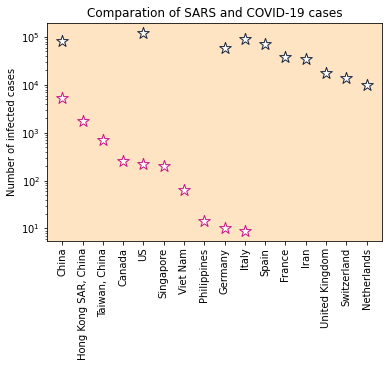

In [ ]:
print_graph(sars_top10_countries, sars_top10_values, coronavirus_top10_countries, coronavirus_top10_values)



---



---



### Top 10 krajów o największej śmiertelności

Porównanie top 10 krajów o największej śmiertelności COVID-19 oraz top 10 krajów o największej śmiertelności SARS.

In [ ]:
def top10_sars_deaths_countries(sars_data):
  """
  Funkcja zwraca 10 krajów o największej śmiertelności SARS.
  """
  top10_deaths_countries = {}
  sorted_sars_data = sars_data.sort_values(by = "Number of deaths", ascending = False)
  for country in sorted_sars_data["Country"]:
    infected = sorted_sars_data.loc[sorted_sars_data["Country"] == country]
    if len(top10_deaths_countries) < 10:
      top10_deaths_countries[country] = infected.values[0][3]
    else:
      return top10_deaths_countries

In [ ]:
def top10_coronavirus_deaths_countries(coronavirus_data):
  """
  Funkcja zwraca 10 krajów o największej śmiertelności COVID-19.
  """
  top10_deaths_countries = {}
  sorted_coronavirus_data = coronavirus_data.sort_values(by = "total_deaths", ascending = False)
  for country in sorted_coronavirus_data["location"]:
    if country != "World":
      infected = sorted_coronavirus_data.loc[sorted_coronavirus_data["location"] == country]
      if len(top10_deaths_countries) < 10:
        top10_deaths_countries[country] = infected.values[0][5]
      else:
        return top10_deaths_countries

In [ ]:
sars_deaths_top10 = top10_sars_deaths_countries(sars_data)  # słownik 10 krajów o największej śmiertelności SARS wraz z ilością infekcji
coronavirus_deaths_top10 = top10_coronavirus_deaths_countries(coronavirus_data2)  # słownik 10 krajów o największej śmiertelności COVID-19 wraz z ilością infekcji
sars_deaths_top10_countries = get_keys_list_from_dictionary(sars_deaths_top10)  # lista 10 krajów o największej śmiertelności SARS
coronavirus_deaths_top10_countries = get_keys_list_from_dictionary(coronavirus_deaths_top10)  # lista 10 krajów o największej śmiertelności COVID-19
sars_deaths_top10_values = get_values_list_from_dictionary(sars_deaths_top10, sars_deaths_top10_countries)  # lista 10 wartości największych śmiertelności SARS
coronavirus_deaths_top10_values = get_values_list_from_dictionary(coronavirus_deaths_top10, coronavirus_deaths_top10_countries)  # lista 10 wartości największych śmiertelności COVID-19

In [ ]:
def print_graph(x1, y1, x2, y2):
  """
  Funkcja zwraca wykres 10 krajów o największej śmiertelności SARS oraz COVID-19.
  """
  plt.rcParams['axes.facecolor'] = "bisque"
  plt.scatter(x1, y1, color= "#C71585",  marker= "*", s = 150, facecolor = "white")
  plt.scatter(x2, y2, color= [(0.100,0.149,0.237)],  marker= "*", s = 150, facecolor = "white")
  plt.xticks(rotation=90)
  plt.yscale('log')  # skala logarytmiczna
  plt.ylabel('Number of deaths')
  plt.title("Comparation of SARS and COVID-19 deaths")
  plt.show()

Wykres przedstawiający top 5 krajów o największej śmiertelności SARS oraz COVID-19.

*   SARS - różowe gwiazdki
*   COVID-19 - granatowe gwiazdki

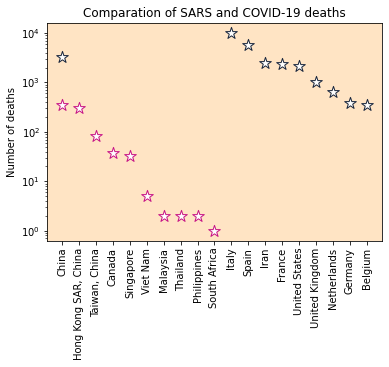

In [ ]:
print_graph(sars_deaths_top10_countries, sars_deaths_top10_values, coronavirus_deaths_top10_countries, coronavirus_deaths_top10_values)



---



---



### Wszystkie przypadki SARS oraz COVID-19

In [ ]:
def all_sars_cases(sars_data):
  """
  Funkcja zwraca wszystkie przypadki SARS.
  """
  all_cases = 0
  sorted_sars_data = sars_data.groupby(["Country"]).max()
  for index in sorted_sars_data.values:
      all_cases += index[1]
  return all_cases

In [ ]:
def all_coronavirus_cases(coronavirus_data):
  """
  Funkcja zwraca wszystkie przypadki COVID-19.
  """
  all_cases = 0
  sorted_coronavirus_data = coronavirus_data.sort_values(by = "total_deaths", ascending = False)
  world_data = sorted_coronavirus_data.loc[sorted_coronavirus_data["location"] == "World"]
  return world_data.loc[world_data["date"] == f"{yesterday().year}-0{yesterday().month}-{yesterday().day}"].values[0][4]

In [ ]:
print(f"All SARS cases: {all_sars_cases(sars_data)}")
print(f"All COVID-19 cases: {all_coronavirus_cases(coronavirus_data2)}")

All SARS cases: 8645
All COVID-19 cases: 591971




---



---



### Wszystkie przypadki śmiertelne SARS oraz COVID-19

In [ ]:
def all_sars_deaths(sars_data):
  """
  Funkcja zwraca wszystkie przypadki śmiertelne SARS.
  """
  all_deaths = 0
  sorted_sars_data = sars_data.groupby(["Country"]).max()
  for index in sorted_sars_data.values:
      all_deaths += index[2]
  return all_deaths

In [ ]:
def all_coronavirus_deaths(coronavirus_data):
  """
  Funkcja zwraca wszystkie przypadki śmiertelne COVID-19.
  """
  all_cases = 0
  sorted_coronavirus_data = coronavirus_data.sort_values(by = "total_deaths", ascending = False)
  world_data = sorted_coronavirus_data.loc[sorted_coronavirus_data["location"] == "World"]
  return world_data.loc[world_data["date"] == f"{yesterday().year}-0{yesterday().month}-{yesterday().day}"].values[0][5]

In [ ]:
print(f"All SARS deaths: {all_sars_deaths(sars_data)}")
print(f"All COVID-19 deaths: {all_coronavirus_deaths(coronavirus_data2)}")

All SARS deaths: 813
All COVID-19 deaths: 26990




---



---



### Śmiertelność SARS oraz COVID-19

In [ ]:
def sars_death_percentage(sars_data):
  """
  Funkcja zwraca śmiertelność SARS.
  """
  percentage = 100 * all_sars_deaths(sars_data)/all_sars_cases(sars_data)
  return percentage

In [ ]:
def coronavirus_death_percentage(coronavirus_data):
  """
  Funkcja zwraca śmiertelność COVID-19.
  """
  percentage = 100 * all_coronavirus_deaths(coronavirus_data)/all_coronavirus_cases(coronavirus_data)
  return percentage

In [ ]:
print(f"SARS death rate: {round(sars_death_percentage(sars_data),2)}%")
print(f"COVID-19 death rate: {round(coronavirus_death_percentage(coronavirus_data2),2)}%")

SARS death rate: 9.4%
COVID-19 death rate: 4.56%
